In [10]:
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv(r'/Users/roman/Desktop/ab data.csv')
data.head(5)

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [102]:
exp_click = data.n_clicks[data.slot == 'exp'].values
control_click = data.n_clicks[data.slot == 'control'].values

In [29]:
(( exp_click.sum() - control_click.sum() ) / control_click.sum() ) * 100

1.6135689824415809

In [30]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [48]:
exp_mean = exp_click.mean()
control_click_mean = control_click.mean()

print(exp_mean,'\n')
print(control_click_mean,"\n")

11.584000994388806 

11.280906260323173 



In [56]:
exp_mean_bs = list(map(np.mean,
                  get_bootstrap_samples(exp_click.values,100)))

control_mean_bs = list(map(np.mean,
                      get_bootstrap_samples(control_click.values,100)))

In [57]:
bnd_exp = stat_intervals(exp_mean_bs,0.05)
bnd_control = stat_intervals(control_mean_bs,0.05)

In [64]:
delta = list(map(lambda x: x[1] - x[0],zip(exp_mean_bs,control_mean_bs)))

In [65]:
stat_intervals(delta,0.05)

array([-0.40341738, -0.20925822])

In [66]:
delta2 = list(map(lambda x: x[1] - x[0],zip(control_mean_bs,exp_mean_bs)))

In [67]:
stat_intervals(delta2,0.05)

array([0.20925822, 0.40341738])

In [68]:
exp_median_bs = list(map(np.median,
                  get_bootstrap_samples(exp_click.values,100)))

control_median_bs = list(map(np.median,
                      get_bootstrap_samples(control_click.values,100)))

bnd_exp = stat_intervals(exp_median_bs,0.05)
bnd_control = stat_intervals(control_median_bs,0.05)

delta3 = list(map(lambda x: x[1] - x[0],zip(control_median_bs,exp_median_bs)))

stat_intervals(delta3,0.05)

array([1., 1.])

In [75]:
np.random.seed(0)
n_boot_samples = 500

samples = get_bootstrap_samples(control_click.values,n_boot_samples)

In [78]:
means =list(map(np.mean,samples))

In [79]:
means

[11.238028634283827,
 11.258428980088137,
 11.325808106721395,
 11.331944024684242,
 11.25147775114741,
 11.265411837471973,
 11.256844043661308,
 11.355630214300273,
 11.21341467700331,
 11.307748265707037,
 11.299612727285506,
 11.254580852843397,
 11.244821721009018,
 11.337018632667261,
 11.26035128657478,
 11.301151978183404,
 11.27396908846827,
 11.278607926790697,
 11.252018948951692,
 11.182443402658196,
 11.22815001721993,
 11.286968378585435,
 11.293276495849645,
 11.27846032738953,
 11.367255424277992,
 11.238527660830632,
 11.242818586278878,
 11.289484596948206,
 11.334913584064887,
 11.272914807031354,
 11.3294980917506,
 11.266142805934901,
 11.344128003823528,
 11.27089761521539,
 11.317704196742973,
 11.298315961118101,
 11.3461768240826,
 11.253055659031327,
 11.337313831469599,
 11.283141336969432,
 11.247088426098385,
 11.36904770272075,
 11.32429696999515,
 11.227717761830794,
 11.284698159224611,
 11.29106601910358,
 11.268648481483304,
 11.267790999247946,
 11.24

In [80]:
import seaborn as sns

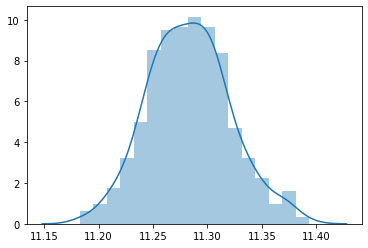

In [82]:
sns.distplot(means)

In [87]:
from matplotlib import pyplot as plt

In [93]:
from scipy import stats

(0.0011968795416019045, 10.686009808530418, 0.9988899574415365)

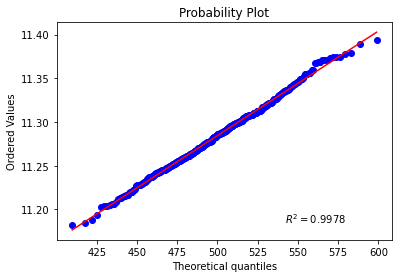

In [141]:
stats.probplot(means,dist="chi2",sparams=len(means)-1,plot=plt,rvalue=True)[1]

In [98]:
variances = list(map(np.var,samples))

(0.20886662879794235, 307.4001265880713, 0.9986416698820314)

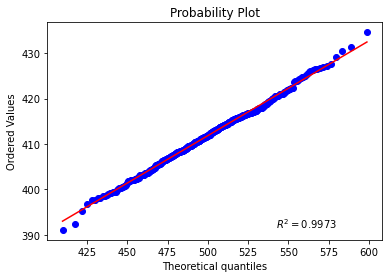

In [142]:
stats.probplot(variances,dist="chi2",sparams=len(means)-1,plot=plt,rvalue=True)[1]

In [104]:
from scipy.stats import mannwhitneyu


In [107]:
mannwhitneyu(exp_click,control_click,alternative='two-sided')

MannwhitneyuResult(statistic=41184125116.0, pvalue=6.247235801369629e-75)

In [119]:
br2 = data[data['browser']=="Browser #2"]
br14 = data[data['browser']=="Browser #14"]
br17 = data[data['browser']=="Browser #17"]
br20 = data[data['browser']=="Browser #20"]
br22 = data[data['browser']=="Browser #22"]
br4 = data[data['browser']=="Browser #4"]

In [113]:
np.unique(data.browser)

array(['Browser #14', 'Browser #17', 'Browser #2', 'Browser #20',
       'Browser #22', 'Browser #4'], dtype=object)

In [129]:
p2 = mannwhitneyu(br2[br2["slot"]=='exp'].n_clicks.values,
            br2[br2["slot"]=='control'].n_clicks.values)[1]

In [130]:
p14 = mannwhitneyu(br14[br14["slot"]=='exp'].n_clicks.values,
            br14[br14["slot"]=='control'].n_clicks.values)[1]

In [131]:
p17 = mannwhitneyu(br17[br17["slot"]=='exp'].n_clicks.values,
            br17[br17["slot"]=='control'].n_clicks.values)[1]

In [132]:
p20 = mannwhitneyu(br20[br20["slot"]=='exp'].n_clicks.values,
            br20[br20["slot"]=='control'].n_clicks.values)[1]

In [133]:
p22 = mannwhitneyu(br22[br22["slot"]=='exp'].n_clicks.values,
            br22[br22["slot"]=='control'].n_clicks.values)[1]

In [134]:
p4 = mannwhitneyu(br4[br4["slot"]=='exp'].n_clicks.values,
            br4[br4["slot"]=='control'].n_clicks.values)[1]

In [135]:
from statsmodels.stats.multitest import multipletests

In [137]:
pd.DataFrame(multipletests([p2,p14,p17,p20,p22,p4],alpha=0.05,method='holm')[1])

,0
0,0.136219
1,0.000000
2,0.149602
3,0.815212
4,0.772217
5,0.815212


In [138]:
pd.DataFrame([p2,p14,p17,p20,p22,p4])

,0
0,0.027244
1,0.000000
2,0.037401
3,0.453667
4,0.257406
5,0.407606
